In [ ]:
import os
import tensorflow
import numpy as np
import pandas as pd
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

In [ ]:
image_size = (128, 128)

batch_size = 128

path_to_cards = '/content/drive/MyDrive/cards/'

'''
train_ds, valid_ds = tensorflow.keras.utils.image_dataset_from_directory(
    path_to_cards + 'train',
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
'''


train_ds = tensorflow.keras.utils.image_dataset_from_directory(
    path_to_cards + 'train',
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
)

valid_ds = tensorflow.keras.utils.image_dataset_from_directory(
    path_to_cards + 'valid',
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
)


test_ds = tensorflow.keras.utils.image_dataset_from_directory(
    path_to_cards + 'test',
    seed=1337,
    labels='inferred',
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
)


# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
valid_ds = valid_ds.prefetch(tf_data.AUTOTUNE)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      49216     
                                                                 
 batch_normalization (Batch  (None, 128, 128, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      131104    
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                        

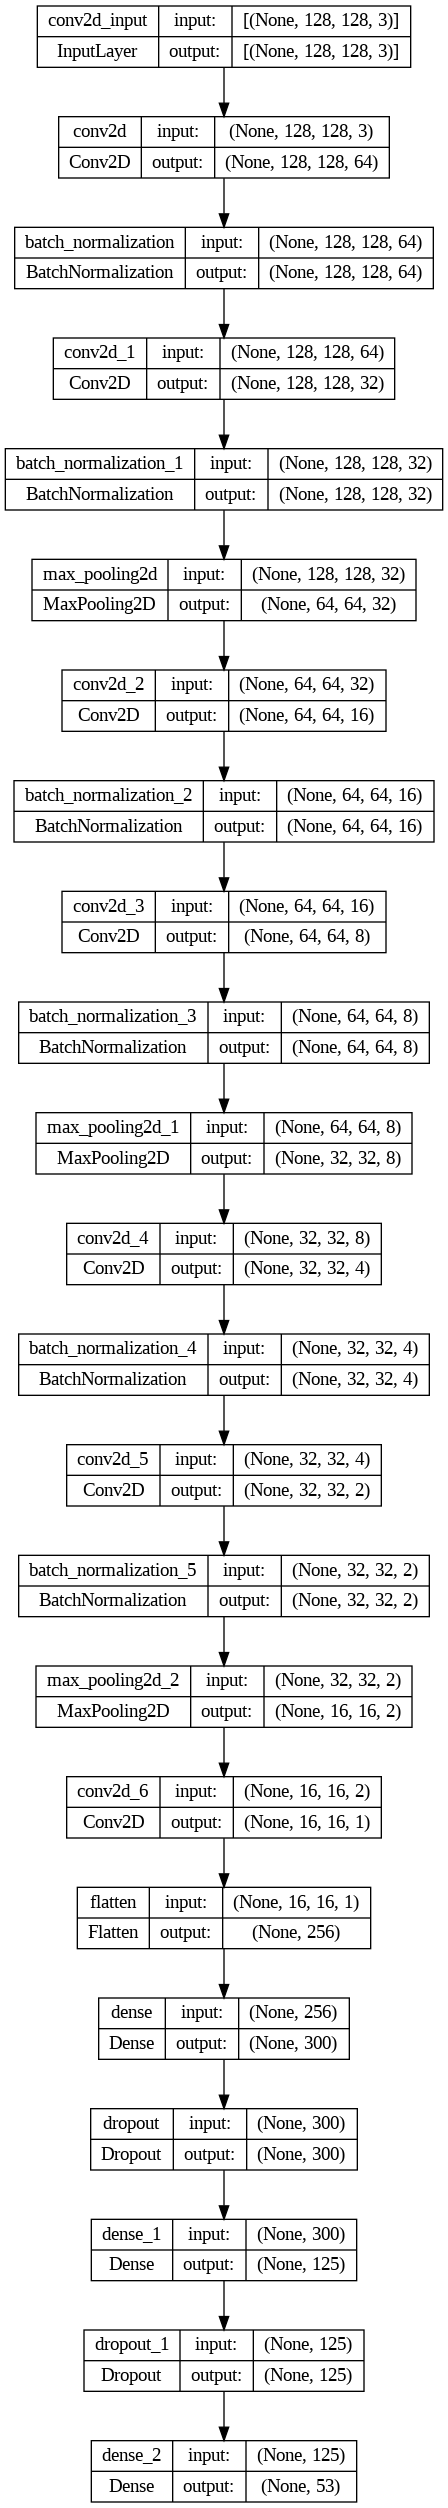

In [ ]:
model = Sequential([
    Convolution2D(filters=64, kernel_size=(16,16), input_shape=(image_size[0], image_size[1], 3), activation='relu', padding='same'),
    #Convolution2D(filters=64, kernel_size=(3,3), '''input_shape=(image_size[0], image_size[1], 3),''' activation='relu', padding='same'),
    #Convolution2D(filters=8, kernel_size=(64,64), input_shape=(), activation='relu', padding='same'),
    BatchNormalization(),
    Convolution2D(filters=32, kernel_size=(8,8), activation='relu', padding='same'),
    #Convolution2D(filters=8, kernel_size=(32,32), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Convolution2D(filters=16, kernel_size=(4,4), input_shape=(), activation='relu', padding='same'),
    #Convolution2D(filters=8, kernel_size=(16,16), input_shape=(), activation='relu', padding='same'),
    BatchNormalization(),
    Convolution2D(filters=8, kernel_size=(4,4), input_shape=(), activation='relu', padding='same'),
    #Convolution2D(filters=8, kernel_size=(8,8), input_shape=(), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Convolution2D(filters=4, kernel_size=(4,4), input_shape=(), activation='relu', padding='same'),
    #Convolution2D(filters=8, kernel_size=(4,4), input_shape=(), activation='relu', padding='same'),
    BatchNormalization(),
    Convolution2D(filters=2, kernel_size=(2,2), input_shape=(), activation='relu', padding='same'),
    #Convolution2D(filters=8, kernel_size=(2,2), input_shape=(), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Convolution2D(filters=1, kernel_size=(2,2), input_shape=(), activation='relu', padding='same'),
    #Convolution2D(filters=8, kernel_size=(3,3), input_shape=(), activation='relu', padding='same'),
    #BatchNormalization(),
    #Convolution2D(filters=4, kernel_size=(3,3), input_shape=(), activation='relu', padding='same'),
    #Convolution2D(filters=4, kernel_size=(3,3), input_shape=(), activation='relu', padding='same'),
    #BatchNormalization(),
    #Convolution2D(filters=2, kernel_size=(3,3), input_shape=(), activation='relu', padding='same'),
    #Convolution2D(filters=2, kernel_size=(3,3), input_shape=(), activation='relu', padding='same'),
    #BatchNormalization(),
    #Convolution2D(filters=1, kernel_size=(3,3), input_shape=(), activation='relu', padding='same'),
    Flatten(),
    Dense(units=300, activation='relu'), #check
    Dropout(0.2),
    Dense(units=125, activation='relu'),
    Dropout(0.1),
    Dense(units=53, activation='softmax')

])

model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)



In [ ]:
epochs = 60

callbacks = [
    tensorflow.keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]


model.compile(
    optimizer=tensorflow.keras.optimizers.Adam(3e-4),
    loss=tensorflow.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)



mod = model.fit(
    train_ds,
    epochs = epochs,
    callbacks=callbacks,
    validation_data=valid_ds
)



Epoch 1/60
60/60 [==============================] - 236s 4s/step - loss: 0.3120 - accuracy: 0.9025 - val_loss: 1.6265 - val_accuracy: 0.6906
Epoch 2/60
60/60 [==============================] - 30s 445ms/step - loss: 0.2865 - accuracy: 0.9108 - val_loss: 1.8294 - val_accuracy: 0.6792
Epoch 3/60
60/60 [==============================] - 31s 460ms/step - loss: 0.2719 - accuracy: 0.9192 - val_loss: 1.7567 - val_accuracy: 0.6906
Epoch 4/60
60/60 [==============================] - 30s 440ms/step - loss: 0.2704 - accuracy: 0.9158 - val_loss: 1.6958 - val_accuracy: 0.7132
Epoch 5/60
60/60 [==============================] - 30s 450ms/step - loss: 0.2762 - accuracy: 0.9138 - val_loss: 1.7494 - val_accuracy: 0.7170
Epoch 6/60
60/60 [==============================] - 30s 452ms/step - loss: 0.2723 - accuracy: 0.9159 - val_loss: 1.5542 - val_accuracy: 0.7057
Epoch 7/60
60/60 [==============================] - 31s 468ms/step - loss: 0.2497 - accuracy: 0.9230 - val_loss: 1.7195 - val_accuracy: 0.7019
E

#augemntacja
#dane
#funkcja strat
#parametry
#eval = model.evaluate()

1/1 [==============================] - 0s 19ms/step
[32]


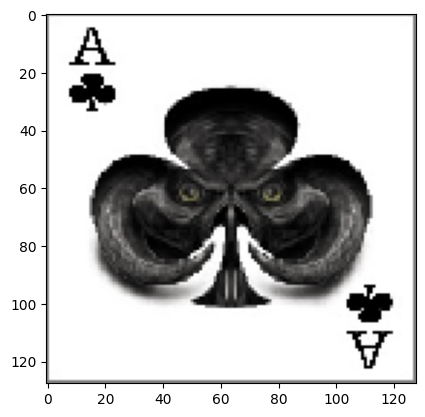

In [ ]:
img = tensorflow.keras.utils.load_img(path_to_cards + "test/ace of clubs/1.jpg", target_size=image_size)
plt.imshow(img)
img_array = tensorflow.keras.utils.img_to_array(img)
img_array = tensorflow.expand_dims(img_array, 0)  # Create batch axis

test_ds.

prob = mod.model.predict(img_array)
y_classes = prob.argmax(axis=-1)
print(y_classes)
#score = float(tf.sigmoid(predictions[0][0]))
#print(f"This image is {100 * (1 - score):.2f}% ")